In [145]:
import rasterio
import os
import numpy as np
import geopandas as gpd
import pandas as pd
import datetime
import rasterio.mask as mask
import matplotlib.pyplot as plt
%matplotlib notebook
import matplotlib.ticker as ticker


In [146]:
vrt_file_2019='sentinel5_NO2_2019.vrt'
vrt_file_2019_entire='sentinel5_NO2_2019_entire.vrt'
vrt_file_2020='sentinel5_NO2_2020.vrt'
top_folder='/home/dohyungkim/air_pollution/tif'
plot_dir='/home/dohyungkim/air_pollution/plot'

In [147]:
sen5_2019=rasterio.open(os.path.join(top_folder,vrt_file_2019))
sen5_2019_entire=rasterio.open(os.path.join(top_folder,vrt_file_2019_entire))
sen5_2020=rasterio.open(os.path.join(top_folder,vrt_file_2020))

In [148]:
sen5_2019_entire.count

18

# process for plots

In [149]:
#name of the file for the target city
#wuhan, mexico_city, delhi, Ulaanbaatar, jakarta
ISO='mexico_city'

border_file=os.path.join('/home/dohyungkim/air_pollution/shp',ISO+'_polygon.geojson')
boder=gpd.read_file(border_file)

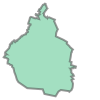

In [150]:
boder['geometry'][0]

In [151]:
def date_range(start, end):
    r = (end+datetime.timedelta(days=1)-start).days
    #print(r)
    return [start+datetime.timedelta(days=i) for i in range(0,r,7)]


In [152]:
def moving_average(y_,window=5):
    return [np.mean(y_[max(0,i-window):i+1]) if i > 0 else y_[i] for i in range(len(y_))]

In [153]:
def get_percent(y1,y2):
    mean=np.nanmean(y1)
    percent=100*(y2-y1)/y1
    return(percent)

In [154]:
year=2020
mon_start=1
date_start=1
mon_end=5
date_end=8

start = datetime.date(year,mon_start,date_start)
end = datetime.date(year,mon_end,date_end)
dateList = date_range(start, end)


In [155]:
dates=[str(date)[-5:] for date in dateList]

In [156]:
df_2019 = pd.DataFrame(np.nan, index=range(len(boder)), columns=dates[:-1])
df_2020 = pd.DataFrame(np.nan, index=range(len(boder)), columns=dates[:-1])

In [157]:
df_2020

,01-01,01-08,01-15,01-22,01-29,02-05,02-12,02-19,02-26,03-04,03-11,03-18,03-25,04-01,04-08,04-15,04-22,04-29
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
geom=[boder['geometry'][0]]
tmp_2020, tmp_transform = mask.mask(sen5_2020, geom, crop=True)
tmp_2019, tmp_transform = mask.mask(sen5_2019, geom, crop=True)
co_mean_2020=np.nanmean(tmp_2020, axis=1)
co_mean_2020=np.nanmean(co_mean_2020, axis=1)
co_mean_2019=np.nanmean(tmp_2019, axis=1)
co_mean_2019=np.nanmean(co_mean_2019, axis=1)
df_2019=list(co_mean_2019.reshape(-1,1).T)
df_2020=list(co_mean_2020.reshape(-1,1).T)
    

<IPython.core.display.Javascript object>


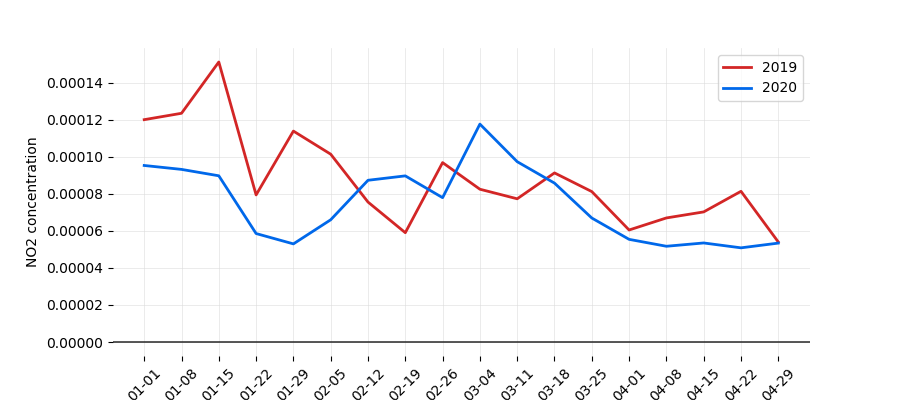

In [159]:
plt.figure(figsize=(9,4))
ax = plt.subplot(111)

x = dates[:-1]
y_2020 = co_mean_2020
y_2019 = co_mean_2019

# plotting the points
ax.plot(x, y_2019,color='#d32626',lw=2,label="2019") 
ax.plot(x, y_2020,color='#0068ea',lw=2,label="2020") 
#ax.axvline(x=measures[ISO][0][0],lw=1.1,color='red',ls='--',zorder=2,label=measures[ISO][0][1])
ax.grid(lw=0.5,alpha=0.8,zorder=1)

# naming the x axis 
#ax.set_xlabel('x - axis') 
# naming the y axis 
ax.set_ylabel('NO2 concentration') 
plt.grid(lw=0.5,alpha=0.8,zorder=1,color='#dcdcdc')
#ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.00%'))
ax.axhline(y=0,color='#282828',ls='-',lw=1.1,zorder=2)
plt.xticks(x, x, rotation=45)
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
# giving a title to my graph 
#ax.set_title('Air pollution: ' + country_name) 
ax.legend()  

plt.show()
plt.savefig(os.path.join(plot_dir,ISO + '.png'),dpi=300,bbox_inches=0,pad=0)



In [160]:
dates[13:18]

['04-01', '04-08', '04-15', '04-22', '04-29']

<IPython.core.display.Javascript object>


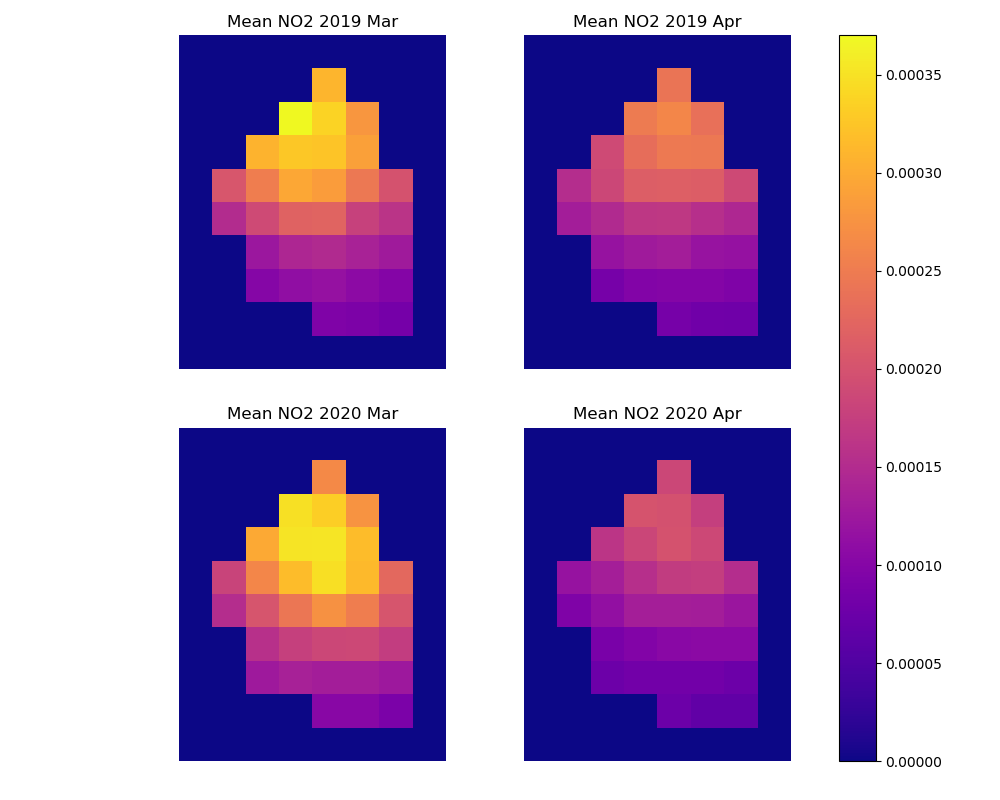

In [161]:
fig, axs=plt.subplots(2,2,figsize=(10,8))
mean_2019_mar=np.nanmean(tmp_2019[9:13,:,:],axis=0)
mean_2019_apr=np.nanmean(tmp_2019[13:18,:,:],axis=0)

mean_2020_mar=np.nanmean(tmp_2020[9:13,:,:],axis=0)
mean_2020_apr=np.nanmean(tmp_2020[13:18,:,:],axis=0)

vmin=np.nanmin(mean_2019_mar)
vmax=np.nanmax(mean_2019_mar)

im = axs[0][0].imshow(mean_2019_mar,vmin=vmin, vmax=vmax, cmap="plasma")
axs[0][0].axis('off')
axs[0][0].set_title('Mean NO2 2019 Mar') 

im = axs[0][1].imshow(mean_2019_apr,vmin=vmin, vmax=vmax, cmap="plasma")
axs[0][1].axis('off')
axs[0][1].set_title('Mean NO2 2019 Apr')

im = axs[1][0].imshow(mean_2020_mar,vmin=vmin, vmax=vmax,cmap="plasma")
axs[1][0].axis('off')
axs[1][0].set_title('Mean NO2 2020 Mar') 

im = axs[1][1].imshow(mean_2020_apr,vmin=vmin, vmax=vmax,cmap="plasma")
axs[1][1].axis('off')
axs[1][1].set_title('Mean NO2 2020 Apr') 

plt.subplots_adjust(wspace=0.01,hspace=0.01)
plt.tight_layout()
plt.colorbar(im, ax=axs, shrink=1)



plt.savefig(os.path.join(plot_dir,ISO + '_NO2map.png'),dpi=300,bbox_inches=0,pad=0)


# NTL plot

In [162]:
top_folder='/mnt/disks/disk1/home/dohyungkim/PA_COVID19/NTL'


In [163]:
DNB_2019_mar=os.path.join(top_folder,'2019','MAR','viirs_composite_resample.vrt')
DNB_2020_mar=os.path.join(top_folder,'2020','MAR','viirs_composite_resample.vrt')
DNB_2019_mar_raster=rasterio.open(DNB_2019_mar)
DNB_2020_mar_raster=rasterio.open(DNB_2020_mar)

In [164]:
DNB_2019_apr=os.path.join(top_folder,'2019','APR','viirs_composite_resample.vrt')
DNB_2020_apr=os.path.join(top_folder,'2020','APR','viirs_composite_resample.vrt')
DNB_2019_apr_raster=rasterio.open(DNB_2019_apr)
DNB_2020_apr_raster=rasterio.open(DNB_2020_apr)

In [165]:
dnb_2019_mar, dnb_transform = mask.mask(DNB_2019_mar_raster, geom, crop=True)
dnb_2020_mar, dnb_transform = mask.mask(DNB_2020_mar_raster, geom, crop=True)
dnb_2019_apr, dnb_transform = mask.mask(DNB_2019_apr_raster, geom, crop=True)
dnb_2020_apr, dnb_transform = mask.mask(DNB_2020_apr_raster, geom, crop=True)

In [166]:
mean_2019_mar.shape

(10, 8)

In [167]:
dnb_2019_mar.shape

(1, 10, 8)

<IPython.core.display.Javascript object>


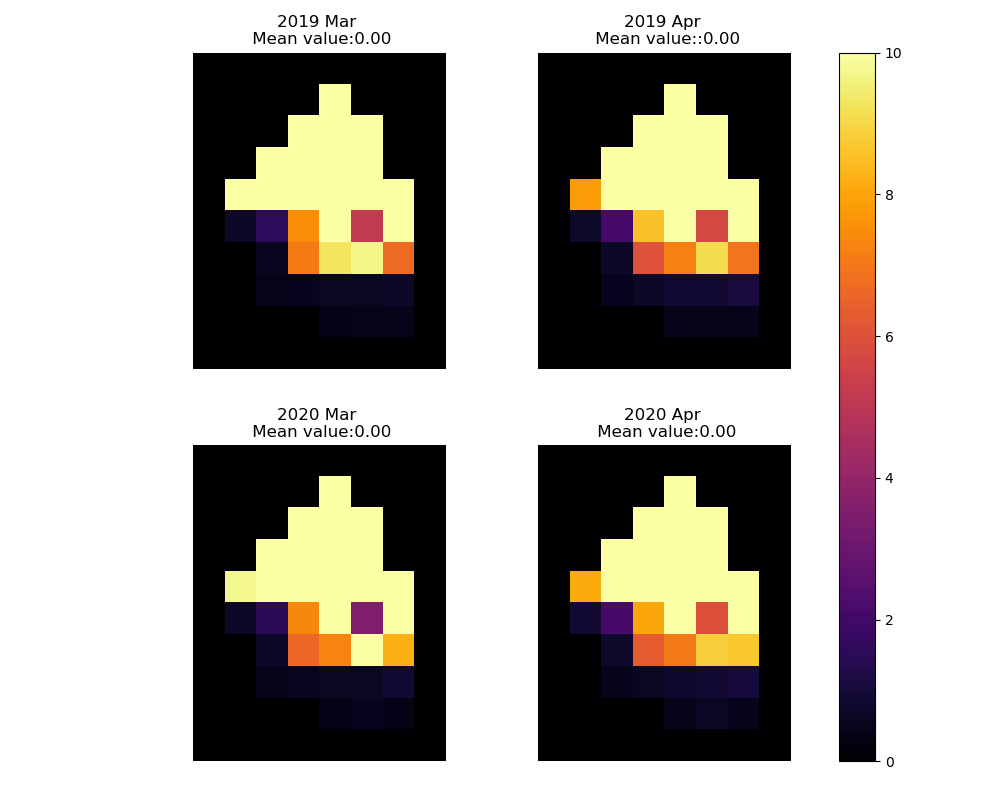

In [168]:
fig, axs=plt.subplots(2,2,figsize=(10,8))

vmin=np.nanmin(dnb_2019_mar)
vmax=np.nanmax(dnb_2019_mar)
vmin=0
vmax=10

im = axs[0][0].imshow(dnb_2019_mar[0],vmin=vmin, vmax=vmax, cmap="inferno")
axs[0][0].axis('off')
axs[0][0].set_title('2019 Mar \n Mean value:' + "{:.2f}".format(np.nanmedian(dnb_2019_mar[0]))) 

im = axs[0][1].imshow(dnb_2019_apr[0],vmin=vmin, vmax=vmax, cmap="inferno")
axs[0][1].axis('off')
axs[0][1].set_title('2019 Apr \n Mean value::' + "{:.2f}".format(np.nanmedian(dnb_2019_apr[0])))

im = axs[1][0].imshow(dnb_2020_mar[0],vmin=vmin, vmax=vmax,cmap="inferno")
axs[1][0].axis('off')
axs[1][0].set_title('2020 Mar \n Mean value:' + "{:.2f}".format(np.nanmedian(dnb_2020_mar[0]))) 

im = axs[1][1].imshow(dnb_2020_apr[0],vmin=vmin, vmax=vmax,cmap="inferno")
axs[1][1].axis('off')
axs[1][1].set_title('2020 Apr \n Mean value:' + "{:.2f}".format(np.nanmedian(dnb_2020_apr[0]))) 

plt.subplots_adjust(wspace=0.01,hspace=0.01)
plt.tight_layout()
plt.colorbar(im, ax=axs, shrink=1)



plt.savefig(os.path.join(plot_dir,ISO + '_NTLmap.png'),dpi=300,bbox_inches=0,pad=0)

<IPython.core.display.Javascript object>


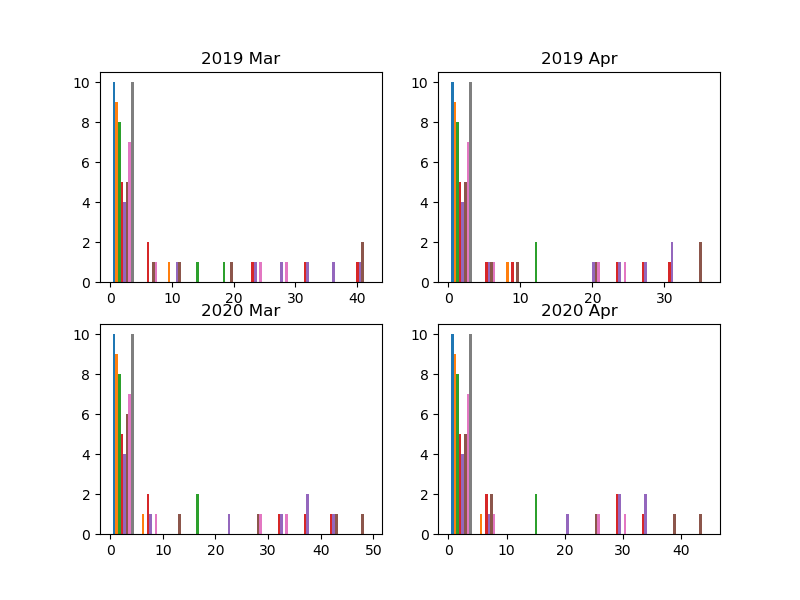

In [169]:
fig, axs=plt.subplots(2,2,figsize=(8,6))

axs[0][0].hist(dnb_2019_mar[0], bins=10)
axs[0][0].set_title('2019 Mar') 
axs[0][1].hist(dnb_2019_apr[0], bins=10)
axs[0][1].set_title('2019 Apr') 
axs[1][0].hist(dnb_2020_mar[0], bins=10)
axs[1][0].set_title('2020 Mar') 
axs[1][1].hist(dnb_2020_apr[0], bins=10)
axs[1][1].set_title('2020 Apr') 


plt.show()

In [170]:
from sklearn.linear_model import LinearRegression

In [172]:
where = np.where(dnb_2019_mar[0]!=0)
dnb_2019_mar_p = np.log(dnb_2019_mar[0][where])
where = np.where(dnb_2019_apr[0]!=0)
dnb_2019_apr_p = np.log(dnb_2019_apr[0][where])
where = np.where(dnb_2020_mar[0]!=0)
dnb_2020_mar_p = np.log(dnb_2020_mar[0][where])
where = np.where(dnb_2020_apr[0]!=0)
dnb_2020_apr_p = np.log(dnb_2020_apr[0][where])


where = np.where(mean_2019_mar!=0)
mean_2019_mar_p = np.log(mean_2019_mar[where])
where = np.where(mean_2019_apr!=0)
mean_2019_apr_p = np.log(mean_2019_apr[where])
where = np.where(mean_2020_mar!=0)
mean_2020_mar_p = np.log(mean_2020_mar[where])
where = np.where(mean_2020_apr!=0)
mean_2020_apr_p = np.log(mean_2020_apr[where])

<IPython.core.display.Javascript object>


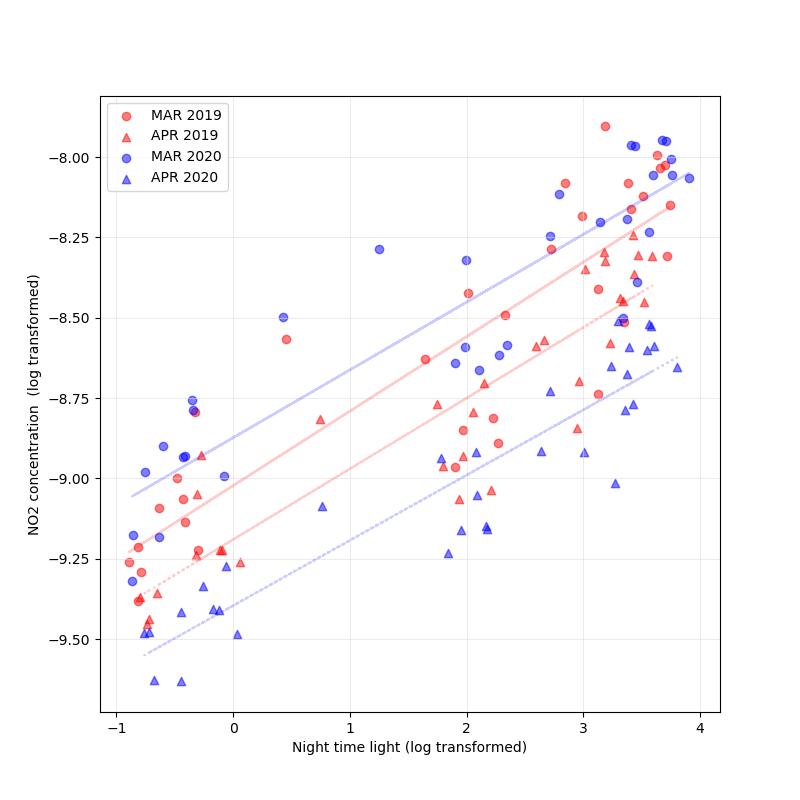

In [204]:
fig, axs=plt.subplots(figsize=(8,8))

axs.scatter(dnb_2019_mar_p,mean_2019_mar_p, marker='o', color='red', alpha=0.5,label="MAR 2019")
linear_regressor = LinearRegression()
linear_regressor.fit(dnb_2019_mar_p.reshape(-1, 1),mean_2019_mar_p.reshape(-1, 1))
X=dnb_2019_mar_p.reshape(-1, 1)
Y_pred = linear_regressor.predict(X)  # make predictions
plt.plot(X, Y_pred, color='red', alpha=0.2)


axs.scatter(dnb_2019_apr_p,mean_2019_apr_p, marker='^', color='red', alpha=0.5,label="APR 2019")
linear_regressor = LinearRegression()
linear_regressor.fit(dnb_2019_apr_p.reshape(-1, 1),mean_2019_apr_p)
X=dnb_2019_apr_p.reshape(-1, 1)
Y_pred = linear_regressor.predict(X)  # make predictions
plt.plot(X, Y_pred,':', color='red', alpha=0.2)

axs.scatter(dnb_2020_mar_p,mean_2020_mar_p, marker='o', color='blue', alpha=0.5,label="MAR 2020")
linear_regressor = LinearRegression()
linear_regressor.fit(dnb_2020_mar_p.reshape(-1, 1),mean_2020_mar_p)
X=dnb_2020_mar_p.reshape(-1, 1)
Y_pred = linear_regressor.predict(X)  # make predictions
plt.plot(X, Y_pred, color='blue', alpha=0.2)

axs.scatter(dnb_2020_apr_p,mean_2020_apr_p, marker='^', color='blue', alpha=0.5,label="APR 2020")
linear_regressor = LinearRegression()
linear_regressor.fit(dnb_2020_apr_p.reshape(-1, 1),mean_2020_apr_p)
X=dnb_2020_apr_p.reshape(-1, 1)
Y_pred = linear_regressor.predict(X)  # make predictions
plt.plot(X, Y_pred, ':', color='blue', alpha=0.2)


axs.set_xlabel('Night time light (log transformed)') 
axs.set_ylabel('NO2 concentration  (log transformed)') 

axs.legend()  
plt.grid(lw=0.5,alpha=0.8,zorder=1,color='#dcdcdc')

plt.savefig(os.path.join(plot_dir,ISO + '_NTL_NO2.png'),dpi=300,bbox_inches=0,pad=0)

NameError: name 'Y_pred' is not defined

In [39]:
mean_2019_mar

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        3.09287287e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.69968523e-04,
        3.37238162e-04, 2.79645740e-04, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 3.09136251e-04, 3.27060439e-04,
        3.24398219e-04, 2.89261279e-04, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.04926855e-04, 2.51813353e-04, 2.97150639e-04,
        2.85204117e-04, 2.46526293e-04, 2.00764627e-04, 0.00000000e+00],
       [0.00000000e+00, 1.51680864e-04, 1.90469460e-04, 2.19988494e-04,
        2.22369933e-04, 1.79132756e-04, 1.60662405e-04, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.23703610e-04, 1.43668172e-04,
        1.48721021e-04, 1.37980298e-04, 1.27690671e-04, 0.

In [122]:
np.median(np.array(dnb_2019_mar.ravel())[0])

0.0

In [131]:
dnb_2019_mar.ravel()

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , 29.55901613,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , 24.11534581,
       37.82230968, 19.80380065,  0.        ,  0.        ,  0.        ,
        0.        , 17.22201452, 40.31751097, 38.71781903, 42.34544452,
        0.        ,  0.        ,  0.        , 10.27614677, 15.29595935,
       33.48685516, 30.37157194, 41.06819484, 28.58025839,  0.        ,
        0.        ,  0.72280355,  1.57025742,  7.49895935, 22.70093   ,
        5.18138452, 22.83426871,  0.        ,  0.        ,  0.        ,
        0.61671871,  7.14159516,  9.30579194,  9.70048839,  6.70379097,
        0.        ,  0.        ,  0.        ,  0.44180452,  0.53116968,
        0.65153419,  0.66349935,  0.7421329 ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.40898935,  0.45

In [42]:
where = np.where(dnb_2019_mar[0]!=0)
np.log(dnb_2019_mar[0][where])

array([ 3.38638881,  3.18284839,  3.63289913,  2.98587387,  2.84618848,
        3.69678589,  3.65629993,  3.74586085,  2.32982536,  2.7275887 ,
        3.51115298,  3.41350704,  3.71523397,  3.35271621, -0.32461781,
        0.45123957,  2.01476426,  3.12240589,  1.6450723 ,  3.12826242,
       -0.48334226,  1.96593616,  2.230637  ,  2.27217623,  1.90267318,
       -0.81688777, -0.63267377, -0.4284254 , -0.4102274 , -0.29822694,
       -0.89406615, -0.78948544, -0.81739681])

In [ ]:
def safe_ln(x):
    #returns: ln(x) but replaces -inf with 0
    l = np.log(x)
    #if l = -inf:
    l = 0
    return l